In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlfinlab as ml
import platform
import datetime
from alpha_vantage.timeseries import TimeSeries
from multiprocessing import cpu_count
%matplotlib inline

In [2]:
#set credentials for stock API
ts = TimeSeries(key = 'PTME3FLJAHB9CY', output_format = 'pandas')

In [3]:
#load sample data
data, meta_data = ts.get_daily_adjusted(symbol = 'MSFT', outputsize = 'full')

In [5]:
#define global variables
PRICE = "5. adjusted close"

In [6]:
#get timestamps where close prices shifts in the mean for a certain threshold
events = ml.filters.cusum_filter(data[PRICE], 0.2)

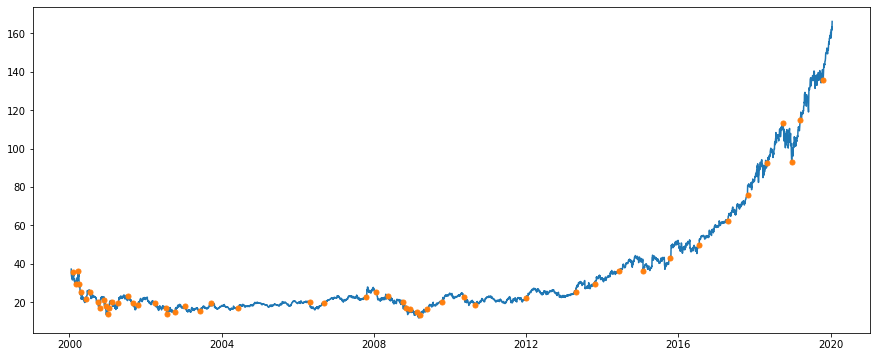

In [9]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(data[PRICE])
ax.plot(data.loc[events][PRICE], "o", markersize = 5)
plt.show()

In [48]:
close = data[PRICE]
pt_sl = [1.05, 1.05]
target = ml.util.get_daily_vol(close = data[PRICE], lookback = 30)
min_ret = 0.01

if platform.system() == "Windows":
    cpus = 1
else:
    cpus = cpu_count()

In [50]:
# get touches of triple event search
triple = ml.labeling.get_events(close, events, pt_sl, target, min_ret, cpus)

2020-01-17 15:33:23.239897 100.0% apply_pt_sl_on_t1 done after 0.0 minutes. Remaining 0.0 minutes.


In [51]:
bins = ml.labeling.get_bins(triple, close)

In [79]:
data.loc[triple.index][PRICE]

2000-02-08    35.4423
2000-03-06    29.2139
2000-03-24    36.0065
2000-04-03    29.2945
2000-04-20    25.4486
2000-06-12    21.5575
2000-07-18    25.3067
2000-09-26    20.2099
2000-10-18    16.6831
2000-11-29    20.9739
2000-12-14    17.8920
2001-01-02    13.9848
2001-01-17    17.0667
2001-02-08    20.0681
2001-04-11    19.3556
2001-07-19    23.3950
2001-08-28    19.5813
2001-10-18    18.2950
2002-04-01    19.4652
2002-07-11    17.0571
2002-07-25    13.8075
2002-10-10    14.9519
2003-01-15    18.1402
2003-06-09    15.3629
2003-09-19    19.3799
2004-06-04    16.8784
2006-04-27    20.0819
2006-09-13    19.2907
2007-10-19    22.7090
2008-01-24    25.1072
2008-05-15    23.1681
2008-10-03    20.1063
2008-11-05    16.8673
2008-12-08    16.1562
2009-02-13    14.6798
2009-03-20    13.2130
2009-05-29    16.2830
2009-10-13    20.2288
Name: 5. adjusted close, dtype: float64

In [83]:
triple[PRICE] = data.loc[triple.index][PRICE]

In [115]:
row = triple.reset_index().iloc[0]
row

index                2000-02-08 00:00:00
t1                   2000-01-24 00:00:00
trgt                            0.072259
pt                                  1.05
sl                                  1.05
5. adjusted close                35.4423
Name: 0, dtype: object

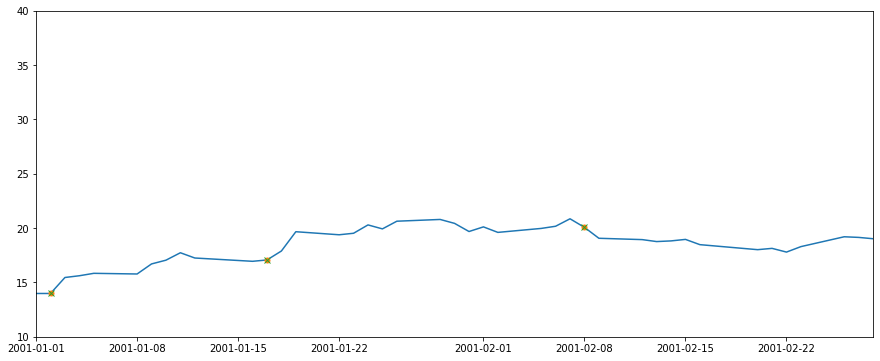

In [62]:
fig, ax = plt.subplots(figsize = (15, 6))
ax.plot(data[PRICE])
ax.plot(data.loc[events][PRICE], "o", markersize = 5)
ax.plot(data.loc[bins.index][PRICE], "x")
ax.set_xlim([datetime.date(2001, 1, 1), datetime.date(2001, 2, 28)])
ax.set_ylim(10, 40)
plt.show()